# Semester Project - Machine Learning
Project made by Nicolas Gregori SUPSI - 2021

In [1]:
autosave 30

Autosaving every 30 seconds


In [2]:
#Various imports
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset description
The dataset contains includes a hourly/daily summary for Szeged, a city located in Hungary, between 2006 and 2016. It contains the following columns: 
- **Formatted Date**
- **Summary**  (weather forecast by hour)
- **Precip Type**
- **Temperature** (in Celsius Degrees)
- **Apparent Temperature** (in Celsius Degrees) - It is the apparent temperature perceived by humans
- **Humidity**
- **Wind Speed** (in km/h)
- **Wind Bearing** (degrees)
- **Visibility** (km)
- **Loud Cover**
- **Pressure** (in millibars)
- **Daily Summer** (weather forecast by day)

Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion).

In [3]:
#Defining portion for train, validation and testing phase
validationPortion = 0.3
testPortion = 0.1 

In [4]:
#Load the dataset from memory 
dfPath = "./resources/weatherHistory.csv"
resPath = "./results/"
df = pd.read_csv(dfPath)

In [5]:
#Print dataset's head      
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
#Getting rows and columns' number
dfNumber = df.shape
print(f"Row number: {dfNumber}")

Row number: (96453, 12)


In [8]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


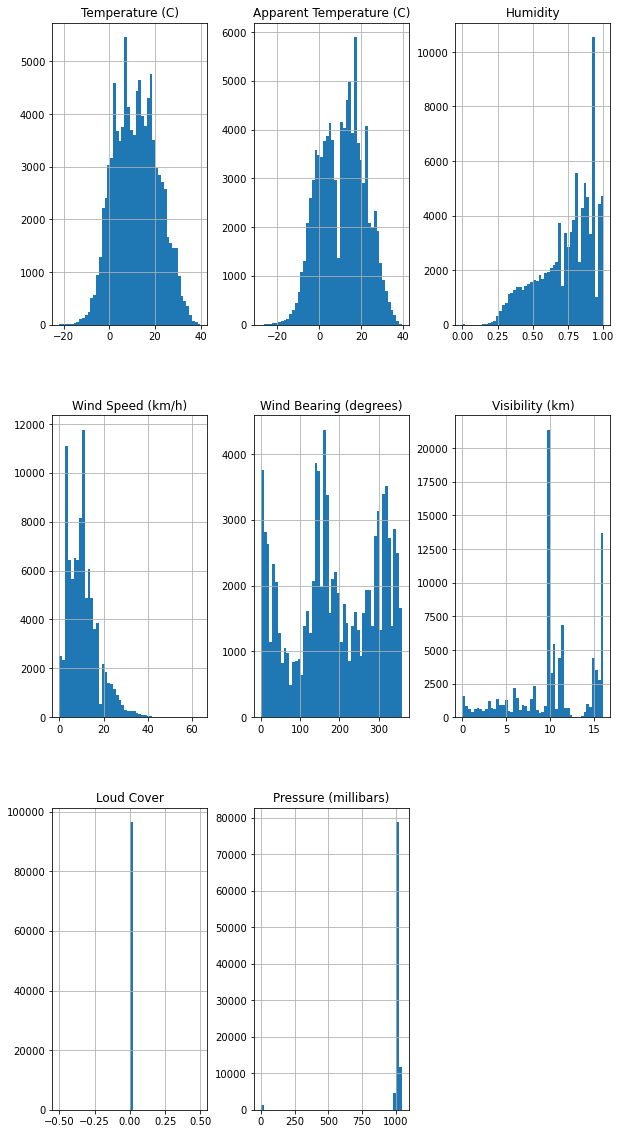

In [9]:
#Print data distribution
df.hist(bins = 50, figsize = (10,20))
plt.show()

In [10]:

df = df.drop(['Formatted Date','Daily Summary', 'Summary', 'Loud Cover'], axis = 1)
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature",
                           "Pressure (millibars)":"Pressure"})
df

,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing (degrees),Visibility (km),Pressure
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [11]:
#Splitting the dataset into train, validation and test dataset
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=testPortion) 
[dfTrain,dfValidation] = train_test_split(dfTrain,random_state=1,test_size=validationPortion) 

## Predicting Apparent Temperature hourly
The apparent temperature is the temperature perceived by humans, caused by the combined effect of air temperature, relative temperature and wind speed. Mostly, it is applied on outdoor perceived temperature. Is it that these features have a great correlation? \
Let's find out.

In [12]:
xData = df[["Temperature","Humidity","Wind Speed"]].values
yData = df["Apparent Temperature"].values

In [13]:
#Preparing datas for train, validation and test phase
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values

xValidation = dfValidation[["Temperature","Humidity","Wind Speed"]].values
yValidation = dfValidation["Apparent Temperature"].values

xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values

In [14]:
reg = LinearRegression()
reg.fit(xTrain,yTrain)
print(f"Intercepts:  {reg.intercept_}")
print(f"Coefficients:  {reg.coef_}")

Intercepts:  -2.331255537356853
Coefficients:  [ 1.1261935   1.05501954 -0.09490606]


In [15]:
#Checking how regressior behaviours with train set
yTrainPredicted = reg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")

RMSE train set: 1.0752758675558702


In [16]:
#Checking how regressior behaviours with validation set
yValidationPredicted = reg.predict(xValidation)
RMSEValidation = np.sqrt(mean_squared_error(yValidation,yValidationPredicted))
print(f"RMSE validation set: {RMSEValidation}")

R2Validation = reg.score(xValidation,yValidation)
print(f"R2 score validation: {R2Validation}")

RMSE validation set: 1.0903252186003443
R2 score validation: 0.9897060759343201


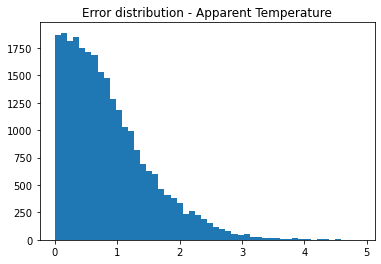

In [17]:
#Show errors distribution
errors = np.abs(yValidation - yValidationPredicted)
plt.figure()
plt.title("Error distribution - Apparent Temperature")
plt.hist(x = errors, bins = 50)
plt.show()

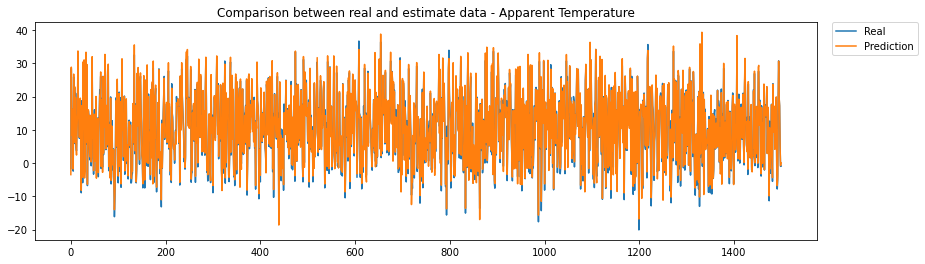

In [18]:
#Show trend between real and predicted (based on a sample of 1500 units)
plt.figure(figsize=(14, 4))
plt.title("Comparison between real and estimate data - Apparent Temperature")
plt.plot(yValidation[0:1500], label='Real')
plt.plot(yValidationPredicted[0:1500], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [19]:
#Try to predict "real" data
yTestPredicted = reg.predict(xTest)
RMSETest = np.sqrt(mean_squared_error(yTest,yTestPredicted))
R2Test = reg.score(xTest,yTest)
print(f"RMSE score test: {RMSETest}")
print(f"R2 score test: {R2Test}")

RMSE score test: 1.0781837660173919
R2 score test: 0.98976767020842


In conclusion, it's a evidence that they have a great correlation. The regression is abled to explain the 98% of all instances. So, there is no reason to try improving its quality through other algorithms. We can always save result in a txt file :).

In [20]:
#Save prediction's data
np.savetxt(resPath + "Apparent Temperature - Predictions",yTestPredicted)

## Predicit Precipation's type

In [21]:
set(df["Precip Type"].values)
df= df.replace(np.nan, 'other', regex=True) # All data frame

<AxesSubplot:xlabel='Humidity', ylabel='Precip Type'>

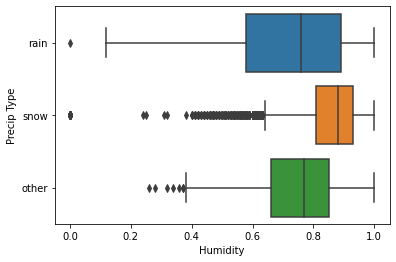

In [22]:
sns.boxplot(x=df["Humidity"],y=df["Precip Type"])

In [23]:
dfCategorical = df.select_dtypes(include=[object])

In [24]:
le = LabelEncoder()
dfCategorical = dfCategorical.apply(le.fit_transform)
set(dfCategorical["Precip Type"].values)

{0, 1, 2}

In [25]:
ohc = OneHotEncoder()
ohc.fit(dfCategorical)
onehotlabels = ohc.transform(dfCategorical).toarray()

In [26]:
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [41]:
df["Precip Type"] = dfCategorical["Precip Type"]
df

,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing (degrees),Visibility (km),Pressure
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [44]:
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=testPortion) 

In [48]:
linReg = LinearRegression()
xTrain = df["Humidity"].values
yTrain = df["Precip Type"]
xTrain = np.reshape(xTrain,(-1,1))
linReg.fit(xTrain,yTrain)

LinearRegression()

## Predicting Atmospheric Pressure
Let's try predicting Pressure using all relevant columns 

In [28]:
targetColumn = ["Pressure"]
predictors = list(set(list(df.columns)) - set(targetColumn))
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10]
params = {'alpha': alpha}

Xs = df[predictors].values
Ys = df[targetColumn].values

xTrain, xTest, yTrain, yTest = train_test_split(Xs,Ys, test_size=0.35, random_state=40)

   ### Ridge Regression

In [29]:
ridge = Ridge()
ridgeReg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv=5)
ridgeReg.fit(xTrain,yTrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error')

In [30]:
ridgeReg.best_params_

{'alpha': 10}

In [31]:
ridgeReg.best_score_

-13396.86815140981

In [32]:
yTestRidgePredicted = ridgeReg.predict(xTest)

In [33]:
ridgeError = np.sqrt(mean_squared_error(yTest,yTestRidgePredicted))
print(f"RMSE score: {ridgeError}")

RMSE score: 117.86751439574266


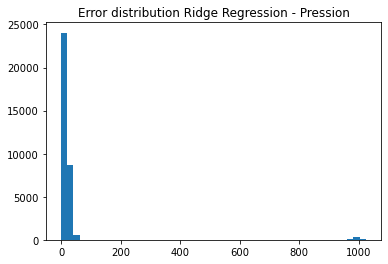

In [34]:
residuals = np.abs(yTest - yTestRidgePredicted)
plt.figure()
plt.title("Error distribution Ridge Regression - Pression")
plt.hist(x = residuals, bins = 50)
plt.show()

### Lasso Regression

In [35]:
lasso = Lasso()
lassoReg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv=5)
lassoReg.fit(xTrain,yTrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             scoring='neg_mean_squared_error')

In [36]:
lassoReg.best_params_

{'alpha': 10}

In [37]:
lassoReg.best_score_

-13396.86815140981

In [38]:
yTestLassoPredicted = lassoReg.predict(xTest)

In [39]:
lassoError = np.sqrt(mean_squared_error(yTest,yTestLassoPredicted))
print(f"RMSE score: {lassoError}")

RMSE score: 117.86751439574266


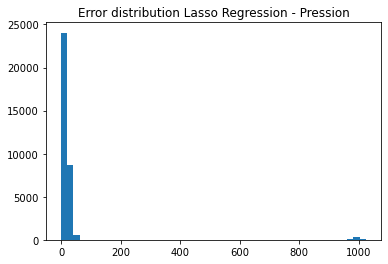

In [40]:
residuals = np.abs(yTest - yTestLassoPredicted)
plt.figure()
plt.title("Error distribution Lasso Regression - Pression")
plt.hist(x = residuals, bins = 50)
plt.show()